In [1]:
import numpy as np
from scipy.signal import argrelextrema
import time

import matplotlib.pyplot as plt
plt.style.use('ggplot')
% matplotlib inline

In [37]:
def FIFO_maker(y):
    y[y == np.inf ] = 10000000000
    arg = np.squeeze(argrelextrema(y, np.less))
    y_FIFO = 1*y
    if arg.shape == ():
        loc = np.argwhere(y <= y[arg])[-2:]
        if loc.shape == (2,1):
            y_FIFO[int(loc[0]):int(loc[1])] = y[arg]
        else:
            None
    else:
        for a in arg:
            loc = np.argwhere(y <= y[a])[-2:] 
            if loc.shape == (2,1):
                y_FIFO[int(loc[0]):int(loc[1])] = y[a]
            else:
                None
    return(y_FIFO)

def FIFO_maker2(W,N1,N2):
    for i in range(N):
        args = i + np.argwhere(W[i:]<W[i])
        if args.shape == (0, 1):
            None
        else:
            j = np.argwhere(W == W[args].min())[0,0]
            if True in N1[i:j]:
                None
            else:
                W[i] = W[j]
    return W

def FIFO_maker3(y,N1,N2):
    #y[y == np.inf ] = 10000000000
    arg = np.squeeze(argrelextrema(y, np.less))
    y_FIFO = 1*y
    if arg.shape == ():
        loc = np.argwhere(y <= y[arg])[-2:]
        if loc.shape == (2,1):
            if True in N1[int(loc[0]):int(loc[1])]:
                None
            else:
                y_FIFO[int(loc[0]):int(loc[1])] = y[arg]
        else:
            None
    else:
        for a in arg:
            loc = np.argwhere(y <= y[a])[-2:] 
            if loc.shape == (2,1):
                if True in N1[int(loc[0]):int(loc[1])]:
                    None
                else:
                    y_FIFO[int(loc[0]):int(loc[1])] = y[a]
            else:
                None
    return(y_FIFO)

In [38]:
N = 100
N1 = np.full(100, False)
N2 = np.full(100, False)
N2[78:85] = True
N1[47:54] = True
N2[47:54] = True

x = np.arange(0,N)
W = 10*np.sin(x/5) + x
W[78:85] = np.inf
W[47:54] = np.inf

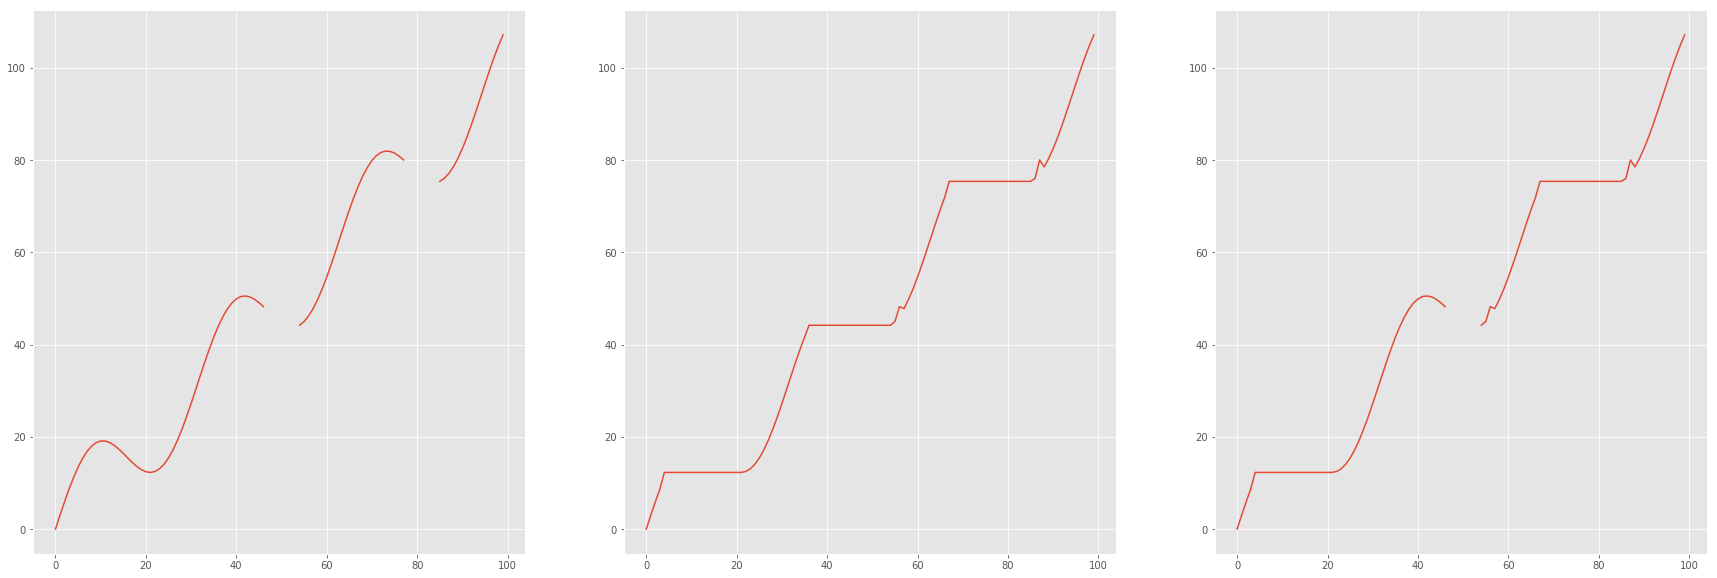

In [39]:
fig = plt.figure(figsize = (30,10))
N = 100
N1 = np.full(100, False)
N2 = np.full(100, False)
N2[78:85] = True
N1[47:54] = True
N2[47:54] = True

x = np.arange(0,N)
W = 10*np.sin(x/5) + x
W[78:85] = np.inf
W[47:54] = np.inf
plt.subplot(131)
plt.plot(x,W)
plt.subplot(132)
N = 100
N1 = np.full(100, False)
N2 = np.full(100, False)
N2[78:85] = True
N1[47:54] = True
N2[47:54] = True

x = np.arange(0,N)
W = 10*np.sin(x/5) + x
W[78:85] = np.inf
W[47:54] = np.inf
WW = FIFO_maker(W)
plt.plot(x, WW)
plt.subplot(133)
N = 100
N1 = np.full(100, False)
N2 = np.full(100, False)
N2[78:85] = True
N1[47:54] = True
N2[47:54] = True

x = np.arange(0,N)
W = 10*np.sin(x/5) + x
W[78:85] = np.inf
W[47:54] = np.inf
WW3 = FIFO_maker3(W, N1, N2)
plt.plot(x, WW3)

In [43]:
start = time.time()

for i in range(1000):
    W2 = FIFO_maker(W)

    
    stop = time.time()
print(stop - start)

0.05475187301635742


In [44]:
start = time.time()

for i in range(1000):
    W2 = FIFO_maker2(W, N1, N2)

    
    stop = time.time()
print(stop - start)

1.0114166736602783


In [45]:
start = time.time()

for i in range(1000):
    W2 = FIFO_maker3(W, N1, N2)

    
    stop = time.time()
print(stop - start)

0.059729576110839844
